In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys

In [2]:
conversion_data = pd.read_csv('C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\sales_campaign_analysis\\data\\KAG_conversion_data.csv')

In [3]:
!cd

C:\Users\DELL\Basecamp3\GLabs_Data_Science_Learn\sales_campaign_analysis\notebook


In [4]:
conversion_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
conversion_data.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

In [6]:
conversion_data.xyz_campaign_id.value_counts().to_dict()

{1178: 625, 936: 464, 916: 54}

In [7]:
conversion_data.xyz_campaign_id.value_counts(dropna=False)

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [8]:
conversion_data.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [9]:
conversion_data.age.nunique()

4

In [10]:
conversion_data.age.count()

1143

In [11]:
conversion_data.age.value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [12]:
conversion_data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [13]:
conversion_data.age.dtype

dtype('O')

In [14]:
conversion_data.Spent.min()

0.0

In [15]:
conversion_data.Spent.max()

639.9499981

In [16]:
conversion_data.Spent.mean()

51.36065613141293

In [17]:
conversion_data.Spent.agg(['mean', 'max', 'min']).round(3)

mean     51.361
max     639.950
min       0.000
Name: Spent, dtype: float64

In [18]:
conversion_data.Clicks.max()

421

In [19]:
conversion_data.Clicks.idxmax()

860

In [20]:
conversion_data.iloc[860]

ad_id                  1121814
xyz_campaign_id           1178
fb_campaign_id          144659
age                      30-34
gender                       F
interest                    27
Impressions            2223278
Clicks                     421
Spent                    612.3
Total_Conversion            38
Approved_Conversion         13
Name: 860, dtype: object

In [21]:
conversion_data.Approved_Conversion.max()

21

In [22]:
conversion_data.iloc[conversion_data.Approved_Conversion.max()]

ad_id                  709323
xyz_campaign_id           916
fb_campaign_id         104012
age                     35-39
gender                      M
interest                   15
Impressions              7132
Clicks                      2
Spent                    2.61
Total_Conversion            1
Approved_Conversion         0
Name: 21, dtype: object

In [23]:
conversion_data.Approved_Conversion[conversion_data.Clicks.argmax()]

13

In [24]:
conversion_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [25]:
conversion_data.ad_id[conversion_data.Approved_Conversion.idxmax()]

1121104

In [30]:
conversion_data['CTR'] = conversion_data.Clicks.divide(conversion_data.Impressions).multiply(100)

In [31]:
conversion_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


<AxesSubplot:>

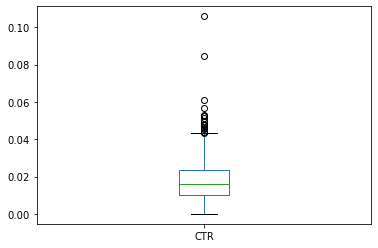

In [33]:
conversion_data.CTR.plot.box()

In [34]:
conversion_data['CPM'] = conversion_data.Spent.divide(conversion_data.Impressions).multiply(1000)

In [36]:
conversion_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPM
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,0.194558
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.101898
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,0.293496
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,0.312122


<AxesSubplot:>

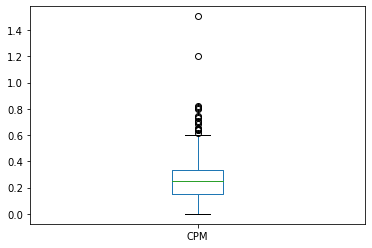

In [37]:
conversion_data.CPM.plot.box()